# Flower Detector

In [2]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random as rn

import cv2
from tqdm import tqdm
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [3]:
pwd

'/content'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
my_data= '/content/drive/MyDrive/DL/flowers'
my_data

'/content/drive/MyDrive/DL/flowers'

In [6]:
os.listdir(my_data)

['daisy', 'dandelion', 'sunflower', 'tulip', 'rose', 'train', 'test']

In [7]:
X = []
Z = []
IMG_SIZE = 150
FLOWER_DAISY_DIR = my_data + '/daisy/'
FLOWER_SUNFLOWER_DIR = my_data + '/sunflower/'
FLOWER_TULIP_DIR = my_data + '/tulip/'
FLOWER_DANDI_DIR = my_data + '/dandelion/'
FLOWER_ROSE_DIR = my_data + '/rose/'
FLOWER_ROSE_DIR

'/content/drive/MyDrive/DL/flowers/rose/'

In [8]:
data_folder = '/content/drive/MyDrive/DL/flowers'

import os
import shutil

train_folder = os.path.join(data_folder, 'train')
test_folder = os.path.join(data_folder, 'test')

train_folder

'/content/drive/MyDrive/DL/flowers/train'

In [9]:
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

classes = ['daisy', 'dandelion', 'rose', 'sunflower','tulip']
classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [10]:
for flower_class in classes:

    train_class_folder = os.path.join(train_folder, flower_class)
    test_class_folder = os.path.join(test_folder, flower_class)
    # create folders
    os.makedirs(train_class_folder, exist_ok=True)
    os.makedirs(test_class_folder, exist_ok=True)

## Randomly add images to train folders

In [11]:
import random

split_ratio = 0.8  # Train  %80, Test  %20
for flower_class in classes:
    flower_images = os.listdir(os.path.join(data_folder, flower_class))
    random.shuffle(flower_images)

    split_index = int(len(flower_images) * split_ratio)

    for image in flower_images[:split_index]:
        src = os.path.join(data_folder, flower_class, image)
        dest = os.path.join(train_folder, flower_class, image)
        shutil.copy(src, dest)

    for image in flower_images[split_index:]:
        src = os.path.join(data_folder, flower_class, image)
        dest = os.path.join(test_folder, flower_class, image)
        shutil.copy(src, dest)


In [12]:
train_path = my_data+'/train/'
test_path = my_data+'/test/'
print(os.listdir(train_path))
print(os.listdir(test_path))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [13]:
import os
import matplotlib.pyplot as plt

classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

data_dir = '/content/drive/MyDrive/DL/flowers'

total_counts = []
total = 0
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    num_images = len([fname for fname in os.listdir(class_dir) if fname.endswith('.jpg')])
    total_counts.append(num_images)
    total += num_images
    print(class_dir)
    print('num of Imgs =', num_images)

print('TOTAL = ',total)
total_counts

/content/drive/MyDrive/DL/flowers/daisy
num of Imgs = 764
/content/drive/MyDrive/DL/flowers/dandelion
num of Imgs = 1076
/content/drive/MyDrive/DL/flowers/rose
num of Imgs = 784
/content/drive/MyDrive/DL/flowers/sunflower
num of Imgs = 733
/content/drive/MyDrive/DL/flowers/tulip
num of Imgs = 984
TOTAL =  4341


[764, 1076, 784, 733, 984]

In [14]:
import seaborn as sns
from skimage.io import imread
import os

x = []
y = []
hue = []

for class_name in classes:
    class_dir = os.path.join(train_path, class_name)

    for image_name in os.listdir(class_dir):
        if image_name.endswith('.jpg'):
            img = imread(os.path.join(class_dir, image_name))
            d1, d2, colors = img.shape
            x.append(d1)
            y.append(d2)
            hue.append(class_name)


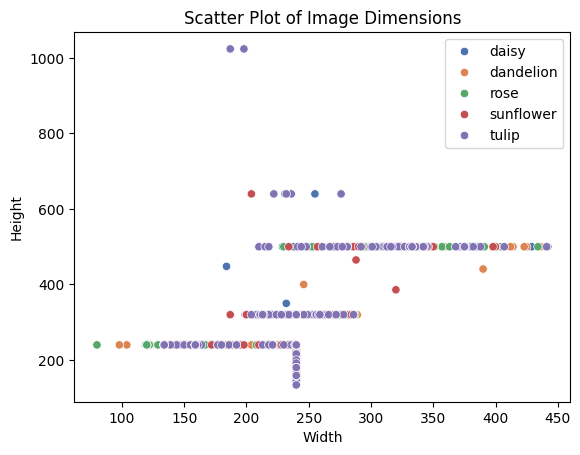

In [15]:
sns.scatterplot(x=x, y=y, hue=hue, palette="deep")
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Scatter Plot of Image Dimensions')
plt.show()

In [16]:
print(np.mean(x), np.mean(y))

253.19277944920157 338.5811154825272


In [17]:
path1=train_path+'/daisy'+"/2001380507_19488ff96a_n.jpg"
path1

'/content/drive/MyDrive/DL/flowers/train//daisy/2001380507_19488ff96a_n.jpg'

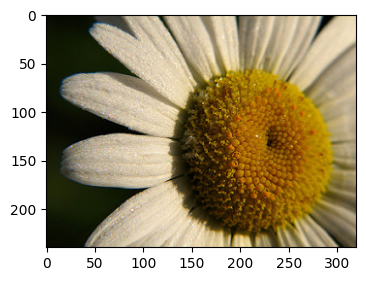

In [18]:
flower_img=imread(path1)
plt.figure(figsize=(4,5))
plt.imshow(flower_img);

In [19]:
path2=train_path+'/daisy'+"/2454280135_ac3aa75cdc_n.jpg"
path2

'/content/drive/MyDrive/DL/flowers/train//daisy/2454280135_ac3aa75cdc_n.jpg'

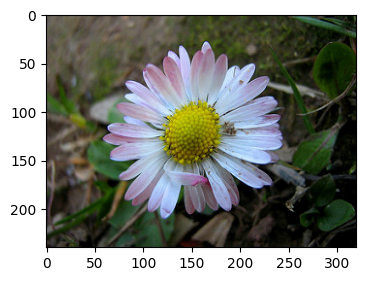

In [20]:
s_flower_img=imread(path2)
plt.figure(figsize=(4,5))
plt.imshow(s_flower_img);

In [21]:
s_img = imread(path2)

s_d1, s_d2, s_colors = s_img.shape
print(s_d1, s_d2, s_colors)

240 320 3


In [22]:
flower_img.max(), flower_img.min()

(255, 0)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

flower_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 10%
                               height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allowe horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )
flower_gen

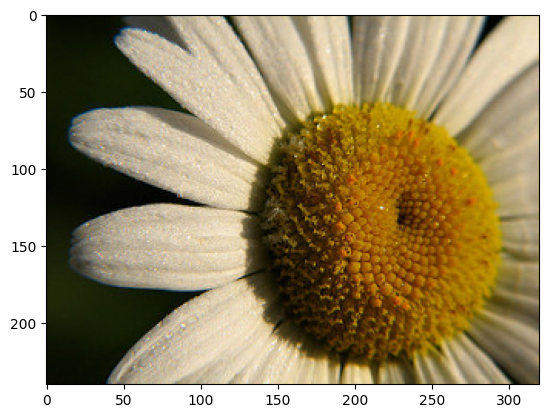

In [24]:
plt.imshow(flower_img)

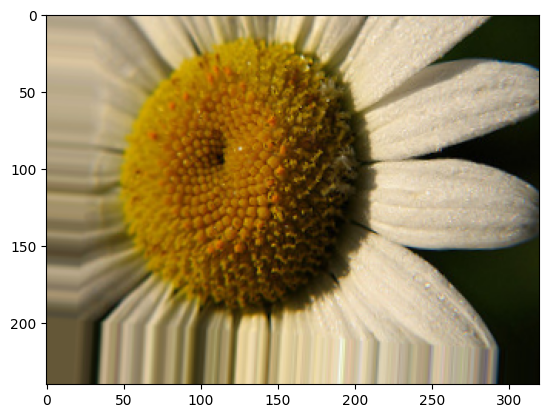

In [25]:
plt.imshow(flower_gen.random_transform(flower_img))

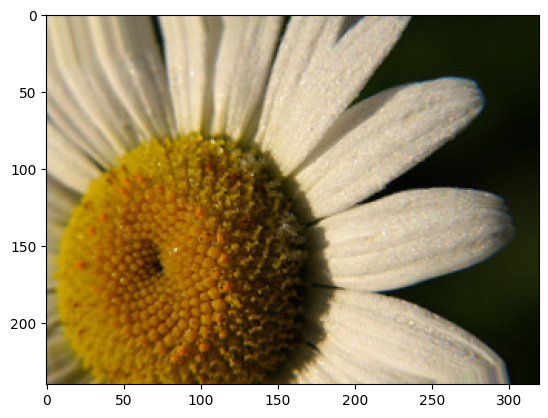

In [26]:
plt.imshow(flower_gen.random_transform(flower_img))

# Create The Model

In [27]:
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D

In [28]:
from tensorflow.keras.layers import BatchNormalization

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# If early stopping is triggered during training, `restore_best_weights` replaces
# the model's weights with the weights that gave the best value for the monitored metric.
# If the loss value starts increasing after a certain point and causes the model to stop,
# this parameter ensures that the weights are replaced with the score where the loss value was lowest.

## Train Images

In [58]:
batch_size = 32
train_flower_gen = flower_gen.flow_from_directory(train_path,

                                               target_size=(299,299),

                                               color_mode='rgb',

                                               batch_size=batch_size,

                                               class_mode='sparse', shuffle=True)

Found 4321 images belonging to 5 classes.


## Test Images

In [59]:
flower_gen_test = ImageDataGenerator()

test_flower_gen = flower_gen_test.flow_from_directory(test_path,

                                                   target_size=(299,299),

                                                   color_mode='rgb',

                                                   batch_size=batch_size,

                                                   class_mode='sparse', shuffle=True)

Found 2376 images belonging to 5 classes.


# Xception

In [60]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model

# Load the Xception base model
xception_base = tf.keras.applications.Xception(
    include_top=False,
    weights='imagenet',
    input_shape=(299, 299, 3)
)

# Freeze the base model
xception_base.trainable = False

# Define the input layer
inputs = Input(shape=(299, 299, 3))

# Connect the input to the base model
x = xception_base(inputs)

# Add the pooling and dense layers
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(5, activation='softmax')(x)

# Create the model
xception_model = Model(inputs, outputs)

# Compile the model
xception_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
xception_model.summary()


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 299, 299, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 10, 10, 2048)        │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_6           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,124,397 (80.58 MB)

 Trainable params: 262,917 (1.00 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [61]:
from tensorflow.keras.callbacks import EarlyStopping


In [62]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [63]:
# Fit the model
history_xception = xception_model.fit(
    train_flower_gen,
    epochs=10,
    validation_data=test_flower_gen,
    callbacks=[early_stop]
)

Epoch 1/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 1065s 8s/step - accuracy: 0.7579 - loss: 0.6623 - val_accuracy: 0.2168 - val_loss: 40.0119
Epoch 2/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 178s 956ms/step - accuracy: 0.8842 - loss: 0.3218 - val_accuracy: 0.2386 - val_loss: 42.0140
Epoch 3/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 135s 958ms/step - accuracy: 0.9084 - loss: 0.2670 - val_accuracy: 0.1801 - val_loss: 55.7211
Epoch 4/10
136/136 ━━━━━━━━━━━━━━━━━━━━ 143s 962ms/step - accuracy: 0.9222 - loss: 0.2245 - val_accuracy: 0.1877 - val_loss: 53.9276


In [64]:
summary = pd.DataFrame(xception_model.history.history)
summary.head()

,accuracy,loss,val_accuracy,val_loss
0,0.823189,0.496320,0.216751,40.011921
1,0.891692,0.302177,0.238636,42.013966
2,0.907660,0.260698,0.180135,55.721123
3,0.921083,0.223912,0.187710,53.927563


from matplotlib import pyplot as plt
_df_0['accuracy'].plot(kind='hist', bins=20, title='accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['loss'].plot(kind='hist', bins=20, title='loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['val_accuracy'].plot(kind='hist', bins=20, title='val_accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['val_loss'].plot(kind='hist', bins=20, title='val_loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='accuracy', y='loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='loss', y='val_accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='val_accuracy', y='val_loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['accuracy']
  ys = series['loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accuracy')
_ = plt.ylabel('loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['accuracy']
  ys = series['val_accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accuracy')
_ = plt.ylabel('val_accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['accuracy']
  ys = series['val_loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accuracy')
_ = plt.ylabel('val_loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['accuracy']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'accuracy'}, axis=1)
              .sort_values('accuracy', ascending=True))
  xs = counted['accuracy']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('accuracy')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['accuracy'].plot(kind='line', figsize=(8, 4), title='accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['loss'].plot(kind='line', figsize=(8, 4), title='loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['val_accuracy'].plot(kind='line', figsize=(8, 4), title='val_accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['val_loss'].plot(kind='line', figsize=(8, 4), title='val_loss')
plt.gca().spines[['top', 'right']].set_visible(False)

In [65]:
xception_model.evaluate(test_flower_gen)

75/75 ━━━━━━━━━━━━━━━━━━━━ 20s 266ms/step - accuracy: 0.2086 - loss: 39.7113


[40.011932373046875, 0.2167508453130722]

# Model Performance

In [66]:
import matplotlib.pyplot as plt

def plot_model_performance(history, title='Model Performance'):
    epochs = range(1, len(history.history['accuracy']) + 1)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], label='Training Acc')
    plt.plot(epochs, history.history['val_accuracy'], label='Validation Acc')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

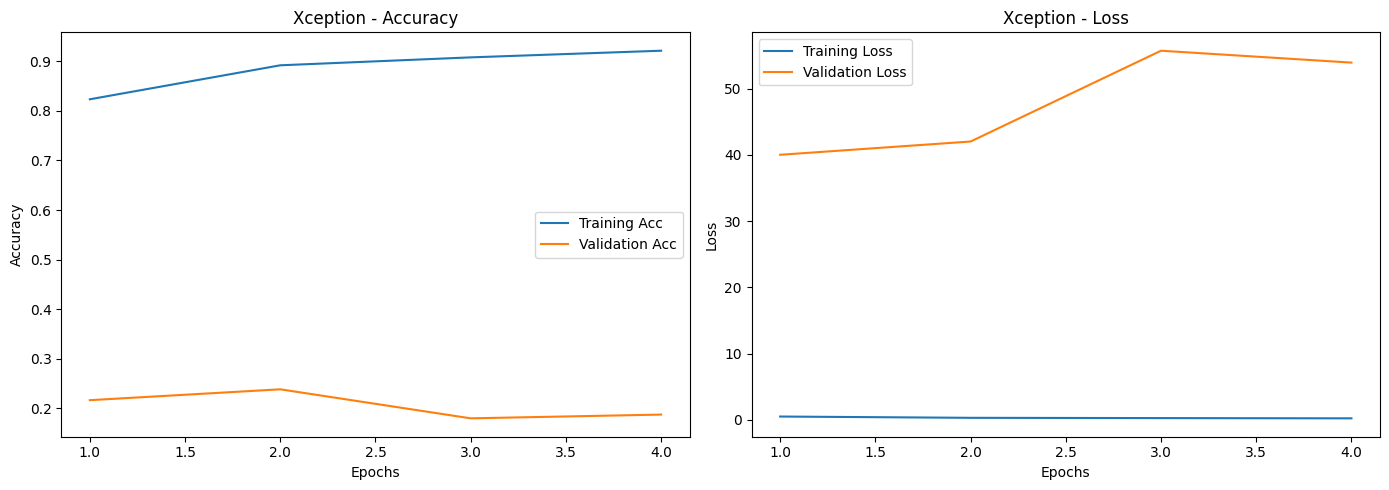

In [67]:

plot_model_performance(history_xception, 'Xception')


# Predicting on an Image

In [68]:
xception_model.metrics_names

['loss', 'compile_metrics']

In [69]:
xception_model.evaluate(test_flower_gen)

75/75 ━━━━━━━━━━━━━━━━━━━━ 23s 304ms/step - accuracy: 0.2234 - loss: 37.9260


[40.01192092895508, 0.2167508453130722]

In [70]:
from tensorflow.keras.preprocessing import image
pred_probabilities = xception_model.predict(test_flower_gen)
pred_probabilities

75/75 ━━━━━━━━━━━━━━━━━━━━ 22s 261ms/step


array([[0.0000000e+00, 3.1424595e-06, 0.0000000e+00, 9.9999690e-01,
        3.2187798e-39],
       [3.5032462e-43, 1.0000000e+00, 0.0000000e+00, 2.3427481e-14,
        1.4933127e-08],
       [1.6412922e-07, 1.7021405e-07, 1.9599965e-03, 8.2995073e-05,
        9.9795663e-01],
       ...,
       [0.0000000e+00, 9.9999893e-01, 0.0000000e+00, 1.1064893e-06,
        9.9958012e-22],
       [1.8078461e-08, 2.1580731e-09, 2.3349445e-02, 1.2901797e-08,
        9.7665060e-01],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 5.6612458e-43,
        9.1187460e-20]], dtype=float32)

In [71]:
from sklearn.metrics import classification_report,confusion_matrix
test_flower_gen.classes


array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [73]:
# Check the connection and directory.
!echo "Drive content:"
!ls "/content/drive/My Drive"

Drive content:
 24-25J-056.gslides
 24-25J-056.pptx
'Colab Notebooks'
'Copy of flowers_detector_resnet152_model.ipynb'
'Copy of Sprout Social Competitive Analysis Template (make a copy to edit).gsheet'
 DL
 DL_09
'DL Report.docx'
 InteractiveSheet_2024-09-27_12_44_03.gsheet
'lab_5 (1).zip'
 lab_5.zip
'new doc'
 php-drive-uploads
"Praneeth's DL video.mp4"
'SA Assignment2'
 SSD.docx
'SSD - new.docx'


In [80]:
model_save_path = '/content/drive/MyDrive/DL/xception_model.keras'
xception_model.save(model_save_path)


In [81]:
# After Run

In [82]:
test_flower_gen.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [83]:
pred_probabilities

array([[0.0000000e+00, 3.1424595e-06, 0.0000000e+00, 9.9999690e-01,
        3.2187798e-39],
       [3.5032462e-43, 1.0000000e+00, 0.0000000e+00, 2.3427481e-14,
        1.4933127e-08],
       [1.6412922e-07, 1.7021405e-07, 1.9599965e-03, 8.2995073e-05,
        9.9795663e-01],
       ...,
       [0.0000000e+00, 9.9999893e-01, 0.0000000e+00, 1.1064893e-06,
        9.9958012e-22],
       [1.8078461e-08, 2.1580731e-09, 2.3349445e-02, 1.2901797e-08,
        9.7665060e-01],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 5.6612458e-43,
        9.1187460e-20]], dtype=float32)

In [84]:
train_flower_gen.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


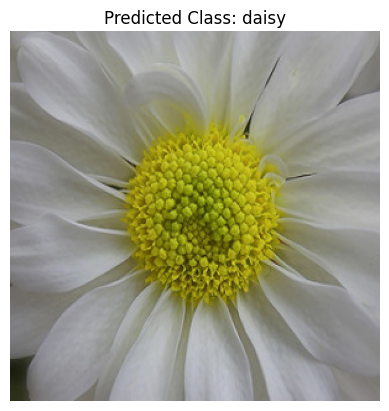

Predicted class index: 0


In [86]:
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

# Dictionary for class indices
class_indices = {0: 'daisy', 1: 'dandelion', 2: 'rose', 3: 'sunflower', 4: 'tulip'}


# Load and preprocess image
image = Image.open('/content/drive/MyDrive/DL/flowers/daisy/100080576_f52e8ee070_n.jpg')
image = image.resize((299, 299))
image_array = np.array(image.convert('RGB')) / 255.0
image_array = np.expand_dims(image_array, axis=0)

# Make prediction
prediction = xception_model.predict(image_array)
predicted_class_index = np.argmax(prediction)

# Display the image and predicted class
plt.imshow(image)
plt.title(f"Predicted Class: {class_indices[predicted_class_index]}")
plt.axis('off')  # To hide axes
plt.show()

print("Predicted class index:", predicted_class_index)
